In [1]:
!pip install -U scikit-learn


  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install -U imbalanced-learn


  Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.0
    Uninstalling imbalanced-learn-0.10.0:
      Successfully uninstalled imbalanced-learn-0.10.0


In [3]:
pip install scikit-learn==1.2.2 imbalanced-learn==0.10.0


  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached imbalanced_learn-0.10.0-py3-none-any.whl (225 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.2
    Uninstalling imbalanced-learn-0.12.2:
      Successfully uninstalled imbalanced-learn-0.12.2


In [8]:
pip install pandas-profiling


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC, RandomOverSampler, KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
# from pandas_profiling import ProfileReport

sns.set()
%matplotlib notebook
%matplotlib inline


In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [15]:
df = pd.read_csv('allhypo.csv')

In [16]:
df.head()

,41,F,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,...,t.2,125,t.3,1.14,t.4,109,f.14,?,SVHC,negative.|3733
0,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
1,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
2,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
3,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
4,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434


In [17]:
# adding columns names to the dataset
df.columns=['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source','Type Class']

In [18]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Type Class
0,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
1,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
2,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
3,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
4,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434


In [19]:
#splitting the traget variable to two columns

In [20]:
df['Type Class'].str.split('|', expand=True)

,0,1
0,negative.,1442
1,negative.,2965
2,negative.,806
3,negative.,2807
4,negative.,3434
...,...,...
2794,negative.,3689
2795,negative.,3652
2796,negative.,1287
2797,negative.,3496


In [21]:
df[['Class', 'Value']]=df['Type Class'].str.split('|', expand=True)

In [22]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Type Class,Class,Value
0,23,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,other,negative.|1442,negative.,1442
1,46,M,f,f,f,f,f,f,f,f,...,t,0.91,t,120,f,?,other,negative.|2965,negative.,2965
2,70,F,t,f,f,f,f,f,f,f,...,f,?,f,?,f,?,other,negative.|806,negative.,806
3,70,F,f,f,f,f,f,f,f,f,...,t,0.87,t,70,f,?,SVI,negative.|2807,negative.,2807
4,18,F,t,f,f,f,f,f,f,f,...,t,1.3,t,141,f,?,other,negative.|3434,negative.,3434


In [23]:
df=df.drop(['Type Class','Value'],axis =1)

In [24]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Class
0,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.
1,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.
2,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.
3,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.
4,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.


In [25]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Class'],
      dtype='object')

In [26]:
df.shape

(2799, 30)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2799 non-null   object
 1   sex                        2799 non-null   object
 2   on thyroxine               2799 non-null   object
 3   query on thyroxine         2799 non-null   object
 4   on antithyroid medication  2799 non-null   object
 5   sick                       2799 non-null   object
 6   pregnant                   2799 non-null   object
 7   thyroid surgery            2799 non-null   object
 8   I131 treatment             2799 non-null   object
 9   query hypothyroid          2799 non-null   object
 10  query hyperthyroid         2799 non-null   object
 11  lithium                    2799 non-null   object
 12  goitre                     2799 non-null   object
 13  tumor                      2799 non-null   object
 14  hypopitu

In [28]:
df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Class                        0
dtype: int64

In [29]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Class
count,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,...,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799
unique,94,3,2,2,2,2,2,2,2,2,...,2,218,2,139,2,210,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative.
freq,75,1829,2469,2759,2765,2689,2758,2760,2751,2636,...,2615,184,2502,297,2504,295,2799,2799,1632,2579


The data description shows clearly that there are no missing values. However, if incorrect entries like "?" are used to fill in the missing values in the collection. I then substituted these values with "nan" and once again checked for missing values.

In [30]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, df[column][df[column]=='?'].count())

age 1
sex 110
TSH 284
T3 585
TT4 184
T4U 297
FTI 295
TBG 2799


We found that many columns, including age, sex, TSH, T3, TT4, T4U, FTI, and TBG, had several missing data. About 95% of the data in TBG are missing. Therefore, there is no need in using the columns, therefore we have removed that column.

In [31]:
df = df.drop(['TBG'],axis =1)

In [32]:
df[['T4U measured','T4U']]

,T4U measured,T4U
0,f,?
1,t,0.91
2,f,?
3,t,0.87
4,t,1.3
...,...,...
2794,t,1.05
2795,t,0.88
2796,t,0.8
2797,t,0.83


In [33]:
df = df.drop(['TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG measured'],axis =1)

In [34]:
# replacing the '?' values with numpy nan
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        df[column] = df[column].replace('?',np.nan)

In [35]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count==0:
        print(column, df[column][df[column]=='?'].count())

age 0
sex 0
on thyroxine 0
query on thyroxine 0
on antithyroid medication 0
sick 0
pregnant 0
thyroid surgery 0
I131 treatment 0
query hypothyroid 0
query hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral source 0
Class 0


Great!! Now that we have replaced all such values with 'nan'. Let's deal with these missing values now.

In [36]:
df.isna().sum()

age                            1
sex                          110
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          284
T3                           585
TT4                          184
T4U                          297
FTI                          295
referral source                0
Class                          0
dtype: int64

All of these values have been changed to "nan." Before applying any imputation methods, convert the categorical values to numerical ones.

Using mapping for columns with two unique values and obtain dummies when there are more than two values since there are only two categories will result in two columns that have extremely high correlation because they both describe the same thing. Therefore, we had to remove one of the columns. For such columns, mapping is used.

In [37]:
# mapping the categorical values like below:
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# so instead of mapping indvidually, usign a loop to do the mapping
for column in df.columns:
    if  len(df[column].unique())==2:
        df[column] = df[column].map({'f' : 0, 't' : 1})

# this will map all the rest of the columns. Now there are handful of column left with more than 2 categories.

In [38]:
df['referral source'].unique() #referel_source has 5 categories usign get dummies on it

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD'], dtype=object)

In [39]:
# using get_dummies with that.
df = pd.get_dummies(df, columns=['referral source'])

In [40]:
df['Class'].unique()

array(['negative.', 'compensated hypothyroid.', 'primary hypothyroid.',
       'secondary hypothyroid.'], dtype=object)

Now there are 4 unique categories in our ouptut class as well. With our Output class, utilizing get dummies makes no sense; instead, simply map them using the LabelEncoder method.

In [41]:
lblEn = LabelEncoder()

df['Class'] =lblEn.fit_transform(df['Class'])

In [42]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4,T4U,FTI,Class,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,23,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,False,False,False,False,True
1,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,False,False,False,False,True
2,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,False,False,False,False,True
3,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,False,False,False,True,False
4,18,0.0,1,0,0,0,0,0,0,0,...,NaN,183,1.3,141,1,False,False,False,False,True


In [43]:
df.describe(include='all')

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4,T4U,FTI,Class,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
count,2798,2689.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,...,2214,2615,2502,2504,2799.000000,2799,2799,2799,2799,2799
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64,217,138,209,NaN,2,2,2,2,2
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,101,0.99,107,NaN,False,False,False,False,True
freq,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,169,62,81,52,NaN,2708,2525,2768,2028,1632
mean,NaN,0.319821,0.117899,0.014291,0.012147,0.039300,0.014648,0.013934,0.017149,0.058235,...,NaN,NaN,NaN,NaN,0.969275,NaN,NaN,NaN,NaN,NaN
std,NaN,0.466494,0.322546,0.118708,0.109562,0.194342,0.120161,0.117236,0.129850,0.234229,...,NaN,NaN,NaN,NaN,0.282538,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


All the encoding for Categorical values is done. Imputing the missing values using KNN Imputer.

In [44]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df) # impute the missing values
# converting the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=df.columns)

In [45]:
new_data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4,T4U,FTI,Class,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
count,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,...,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000
mean,51.849946,0.311183,0.117899,0.014291,0.012147,0.039300,0.014648,0.013934,0.017149,0.058235,...,2.033583,109.159343,1.022508,110.580922,0.969275,0.032512,0.097892,0.011075,0.275456,0.583065
std,20.460364,0.463060,0.322546,0.118708,0.109562,0.194342,0.120161,0.117236,0.129850,0.234229,...,0.782868,34.552676,0.166516,31.959462,0.282538,0.177386,0.297222,0.104674,0.446823,0.493140
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,89.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,125.000000,1.000000,124.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
new_data.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral source_STMW         0
referral source_SVHC         0
referral source_SVHD         0
referral source_SVI          0
referral source_other        0
dtype: int64

Now there are no missing values in the new dataset.

Checking the distribution for continous data in the dataset:


<ipython-input-47-e17820ee7d36>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[column])
<ipython-input-47-e17820ee7d36>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[column])
<ipython-input-47-e17820ee7d36>:8: UserWarning: 

`distplot` is a deprecated function and will be 

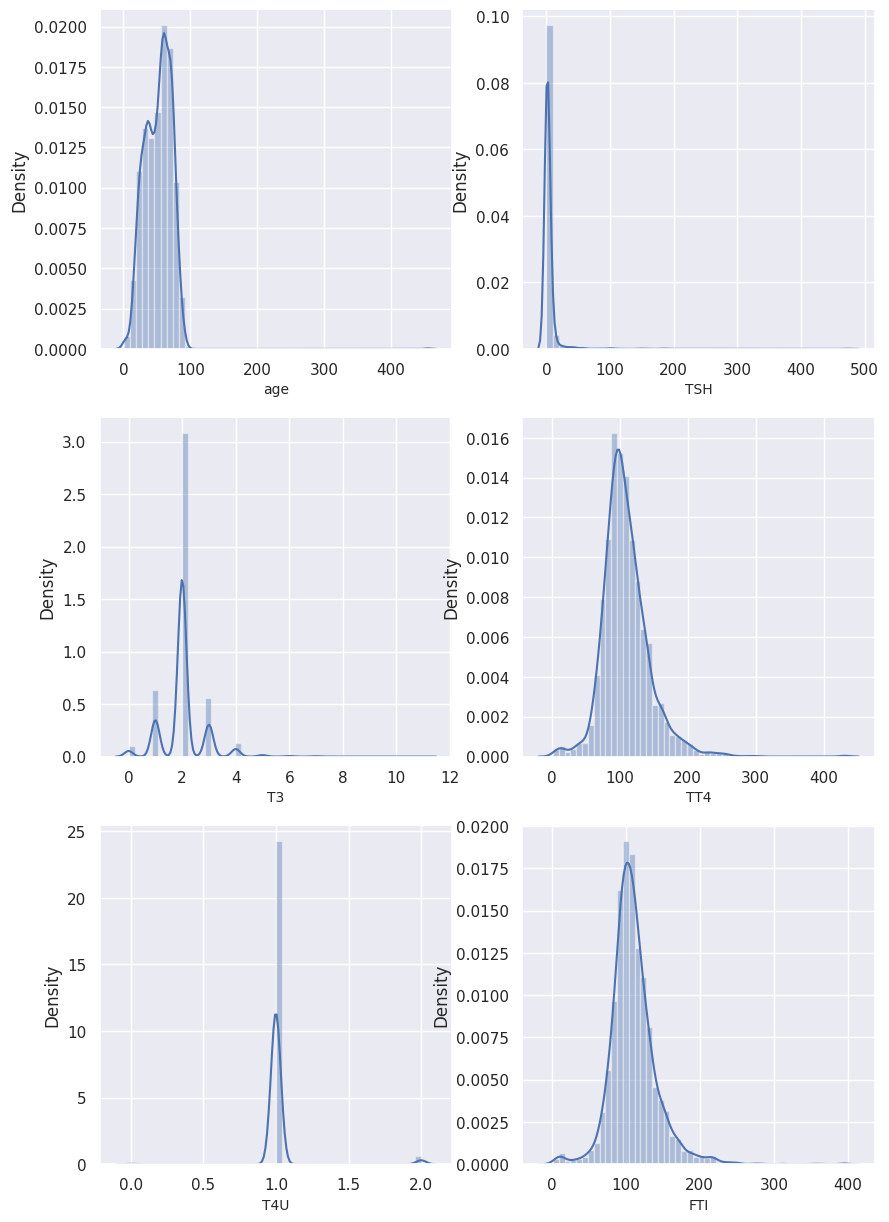

In [47]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(new_data[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

In [48]:
# col = ['age','TSH','T3','TT4','T4U','FTI']
# fig, axes = plt.subplots(nrows = 3, ncols = 2)    # axes is 2d array (3x3)
# axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(10, 15)

# for ax, col in zip(axes, df.columns):
#   sns.distplot(df[col], ax = ax)
#   ax.set_title(col)
# plot.show()

Age, TSH, and T3 graphs seem to be heavily skewed to the left. Let's change the data a little bit and see if the graphic becomes better.

To handle an exception while trying to get the log of "0," let's add 1 to each value in the column before doing the log transformation.

<ipython-input-49-419424e4a160>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(new_data[column]))
<ipython-input-49-419424e4a160>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(new_data[column]))
<ipython-input-49-419424e4a160>:9: UserWarning: 

`distplot` is a deprecated funct

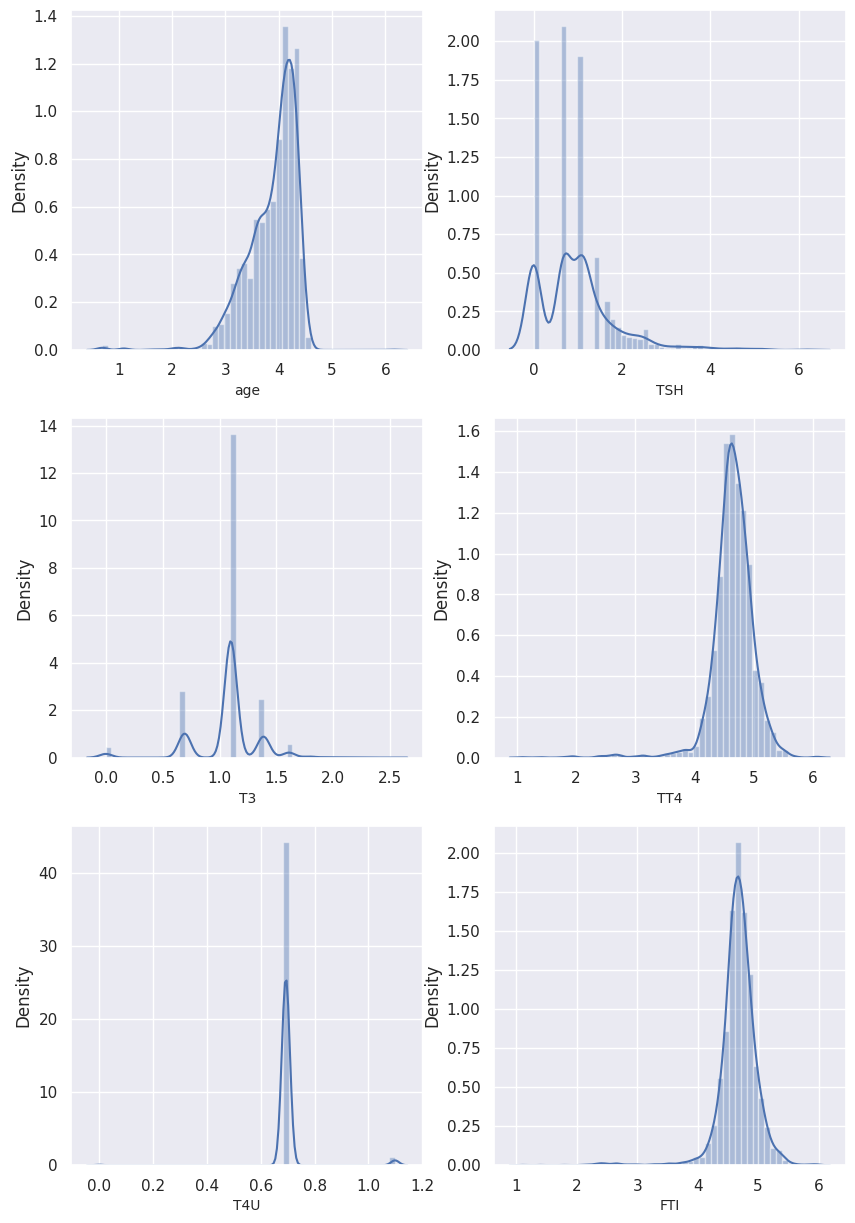

In [49]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_data[column]+=1
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_data[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

The other columns seem OK after log transformation, but "TSH" exhibits an odd trend.
This column is being dropped since it won't provide much information.

## Checking how balanced the dataset in terms of given target classes:


In [50]:
new_data = new_data.drop(['TSH'],axis=1)

<Axes: ylabel='count'>

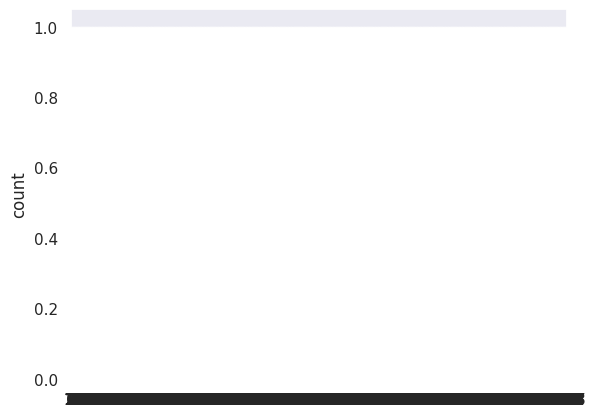

In [51]:
sns.countplot(new_data['Class'])

The dataset is seriously skewed. To cope with unbalanced data, we thus implement imbalanced-learn. RandomOverSampler is an algorithm use for imbalanced learning.

### Handling imbalanced dataset

In [52]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [53]:
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [54]:
x_sampled.shape

(10316, 25)

In [55]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)

In [56]:
x_sampled

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,psych,T3,TT4,T4U,FTI,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,103.0,2.0,97.0,0.0,0.0,0.0,0.0,1.0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
2,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0
4,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,184.0,2.0,142.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
10312,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
10313,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
10314,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0


<Axes: ylabel='count'>

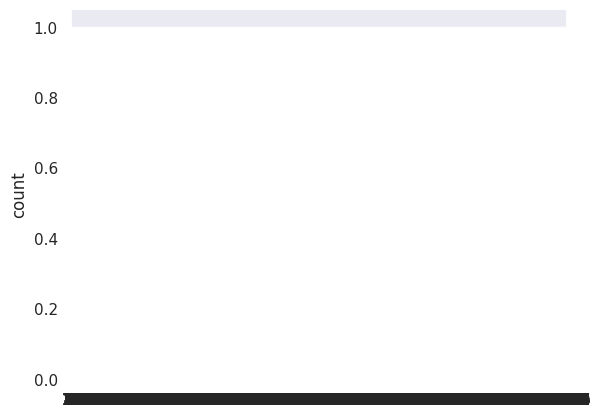

In [57]:
sns.countplot(y_sampled)

The dataset looks balanced now.

Checking for corelations in dataset

In [58]:
#combining the data and keeping it
combined_data = pd.concat([x_sampled, y_sampled], axis=1)
combined_data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4,T4U,FTI,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other,Class
0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,103.0,2.0,97.0,0.0,0.0,0.0,0.0,1.0,1.0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0,1.0
2,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0,1.0
3,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0
4,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,184.0,2.0,142.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0
10312,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0
10313,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0
10314,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0


<Axes: >

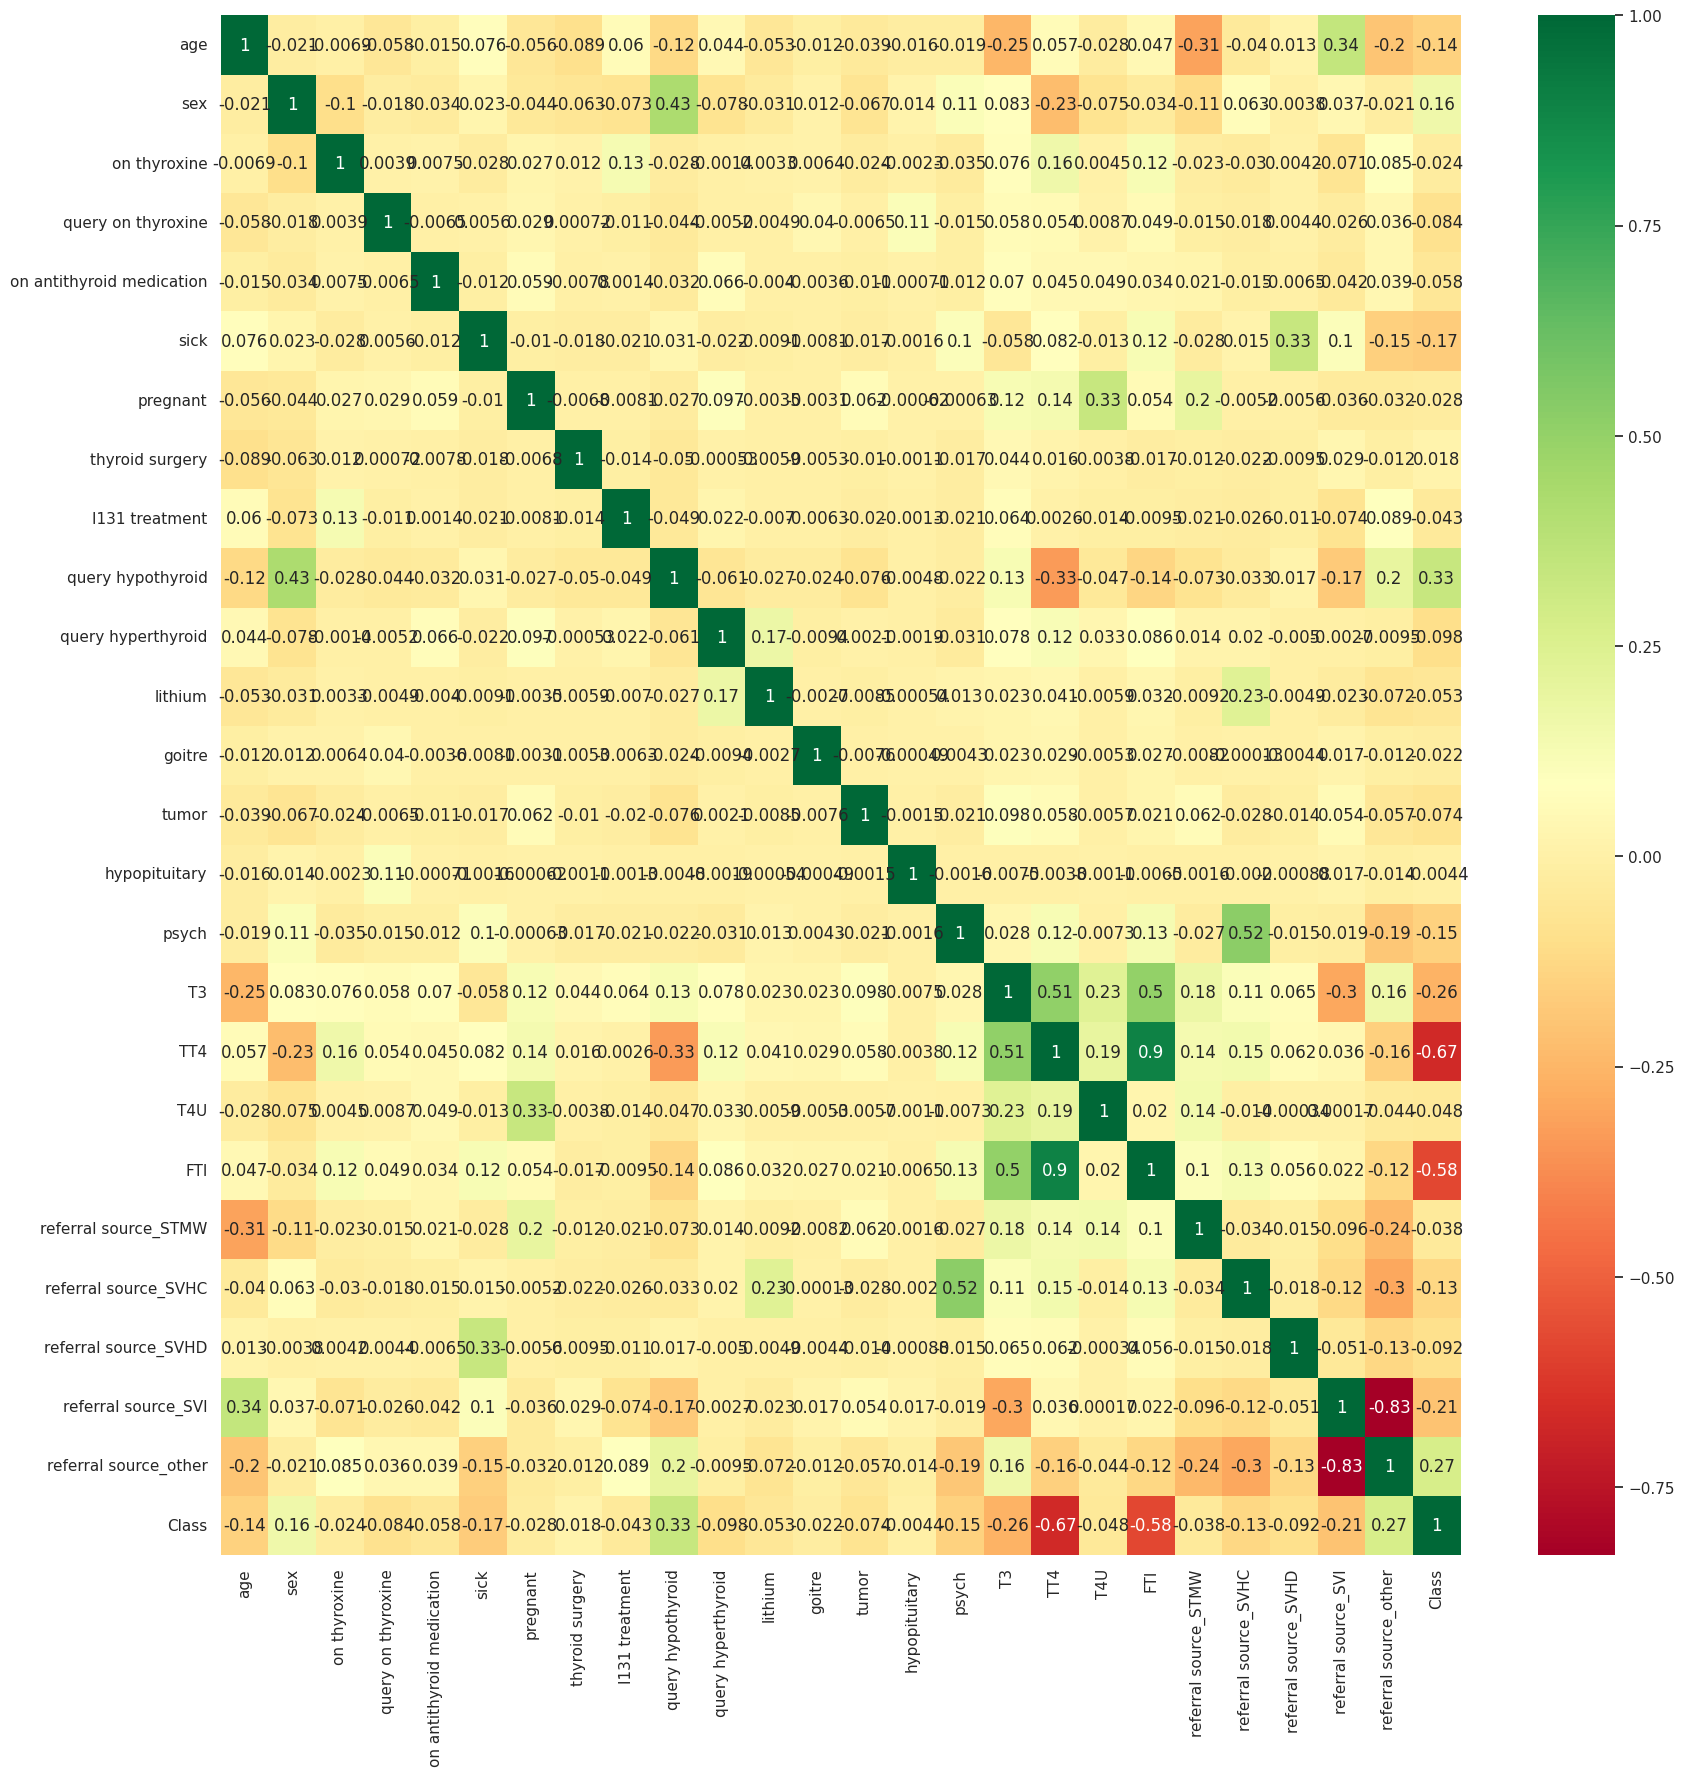

In [59]:
#get correlations of each features in dataset
corrmat = combined_data.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(20,20))
#plot heat map
sns.heatmap(combined_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can see target class is negatively corelated with TT4 and FTI

In [60]:
combined_data.corr()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4,T4U,FTI,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other,Class
age,1.000000,-0.021271,-0.006917,-0.057993,-0.015347,0.076186,-0.055728,-0.088910,0.060391,-0.118999,...,-0.251396,0.057443,-0.027683,0.047250,-0.312148,-0.040468,0.013396,0.344936,-0.195822,-0.144795
sex,-0.021271,1.000000,-0.100182,-0.018468,-0.033591,0.023050,-0.044194,-0.063239,-0.073069,0.425155,...,0.082639,-0.228177,-0.075169,-0.034211,-0.114318,0.063468,-0.003783,0.037114,-0.020628,0.163176
on thyroxine,-0.006917,-0.100182,1.000000,0.003892,0.007458,-0.027518,0.027173,0.012394,0.130763,-0.027959,...,0.076405,0.156598,0.004492,0.124507,-0.022659,-0.030009,0.004171,-0.071190,0.085475,-0.023564
query on thyroxine,-0.057993,-0.018468,0.003892,1.000000,-0.006493,0.005581,0.029046,0.000721,-0.011447,-0.044020,...,0.057969,0.054291,0.008715,0.049122,-0.014951,-0.018395,0.004405,-0.026354,0.036448,-0.083968
on antithyroid medication,-0.015347,-0.033591,0.007458,-0.006493,1.000000,-0.011982,0.059470,-0.007770,0.001399,-0.032282,...,0.070275,0.044766,0.048605,0.034003,0.020951,-0.014907,-0.006453,-0.041806,0.038842,-0.057673
sick,0.076186,0.023050,-0.027518,0.005581,-0.011982,1.000000,-0.010434,-0.017692,-0.021124,0.031421,...,-0.057740,0.081763,-0.012686,0.123023,-0.027591,0.014974,0.333650,0.099895,-0.151895,-0.168234
pregnant,-0.055728,-0.044194,0.027173,0.029046,0.059470,-0.010434,1.000000,-0.006766,-0.008078,-0.027174,...,0.122408,0.141216,0.329576,0.054418,0.198038,-0.005167,-0.005620,-0.036404,-0.031852,-0.028250
thyroid surgery,-0.088910,-0.063239,0.012394,0.000721,-0.007770,-0.017692,-0.006766,1.000000,-0.013697,-0.050361,...,0.044450,0.015506,-0.003821,-0.016749,-0.012257,-0.022010,-0.009528,0.029263,-0.011717,0.017604
I131 treatment,0.060391,-0.073069,0.130763,-0.011447,0.001399,-0.021124,-0.008078,-0.013697,1.000000,-0.049273,...,0.063587,0.002638,-0.013740,-0.009459,-0.021361,-0.026281,-0.011377,-0.073701,0.088705,-0.042722
query hypothyroid,-0.118999,0.425155,-0.027959,-0.044020,-0.032282,0.031421,-0.027174,-0.050361,-0.049273,1.000000,...,0.127258,-0.334860,-0.046672,-0.136351,-0.073104,-0.032780,0.017266,-0.174210,0.196845,0.329401


<Axes: >

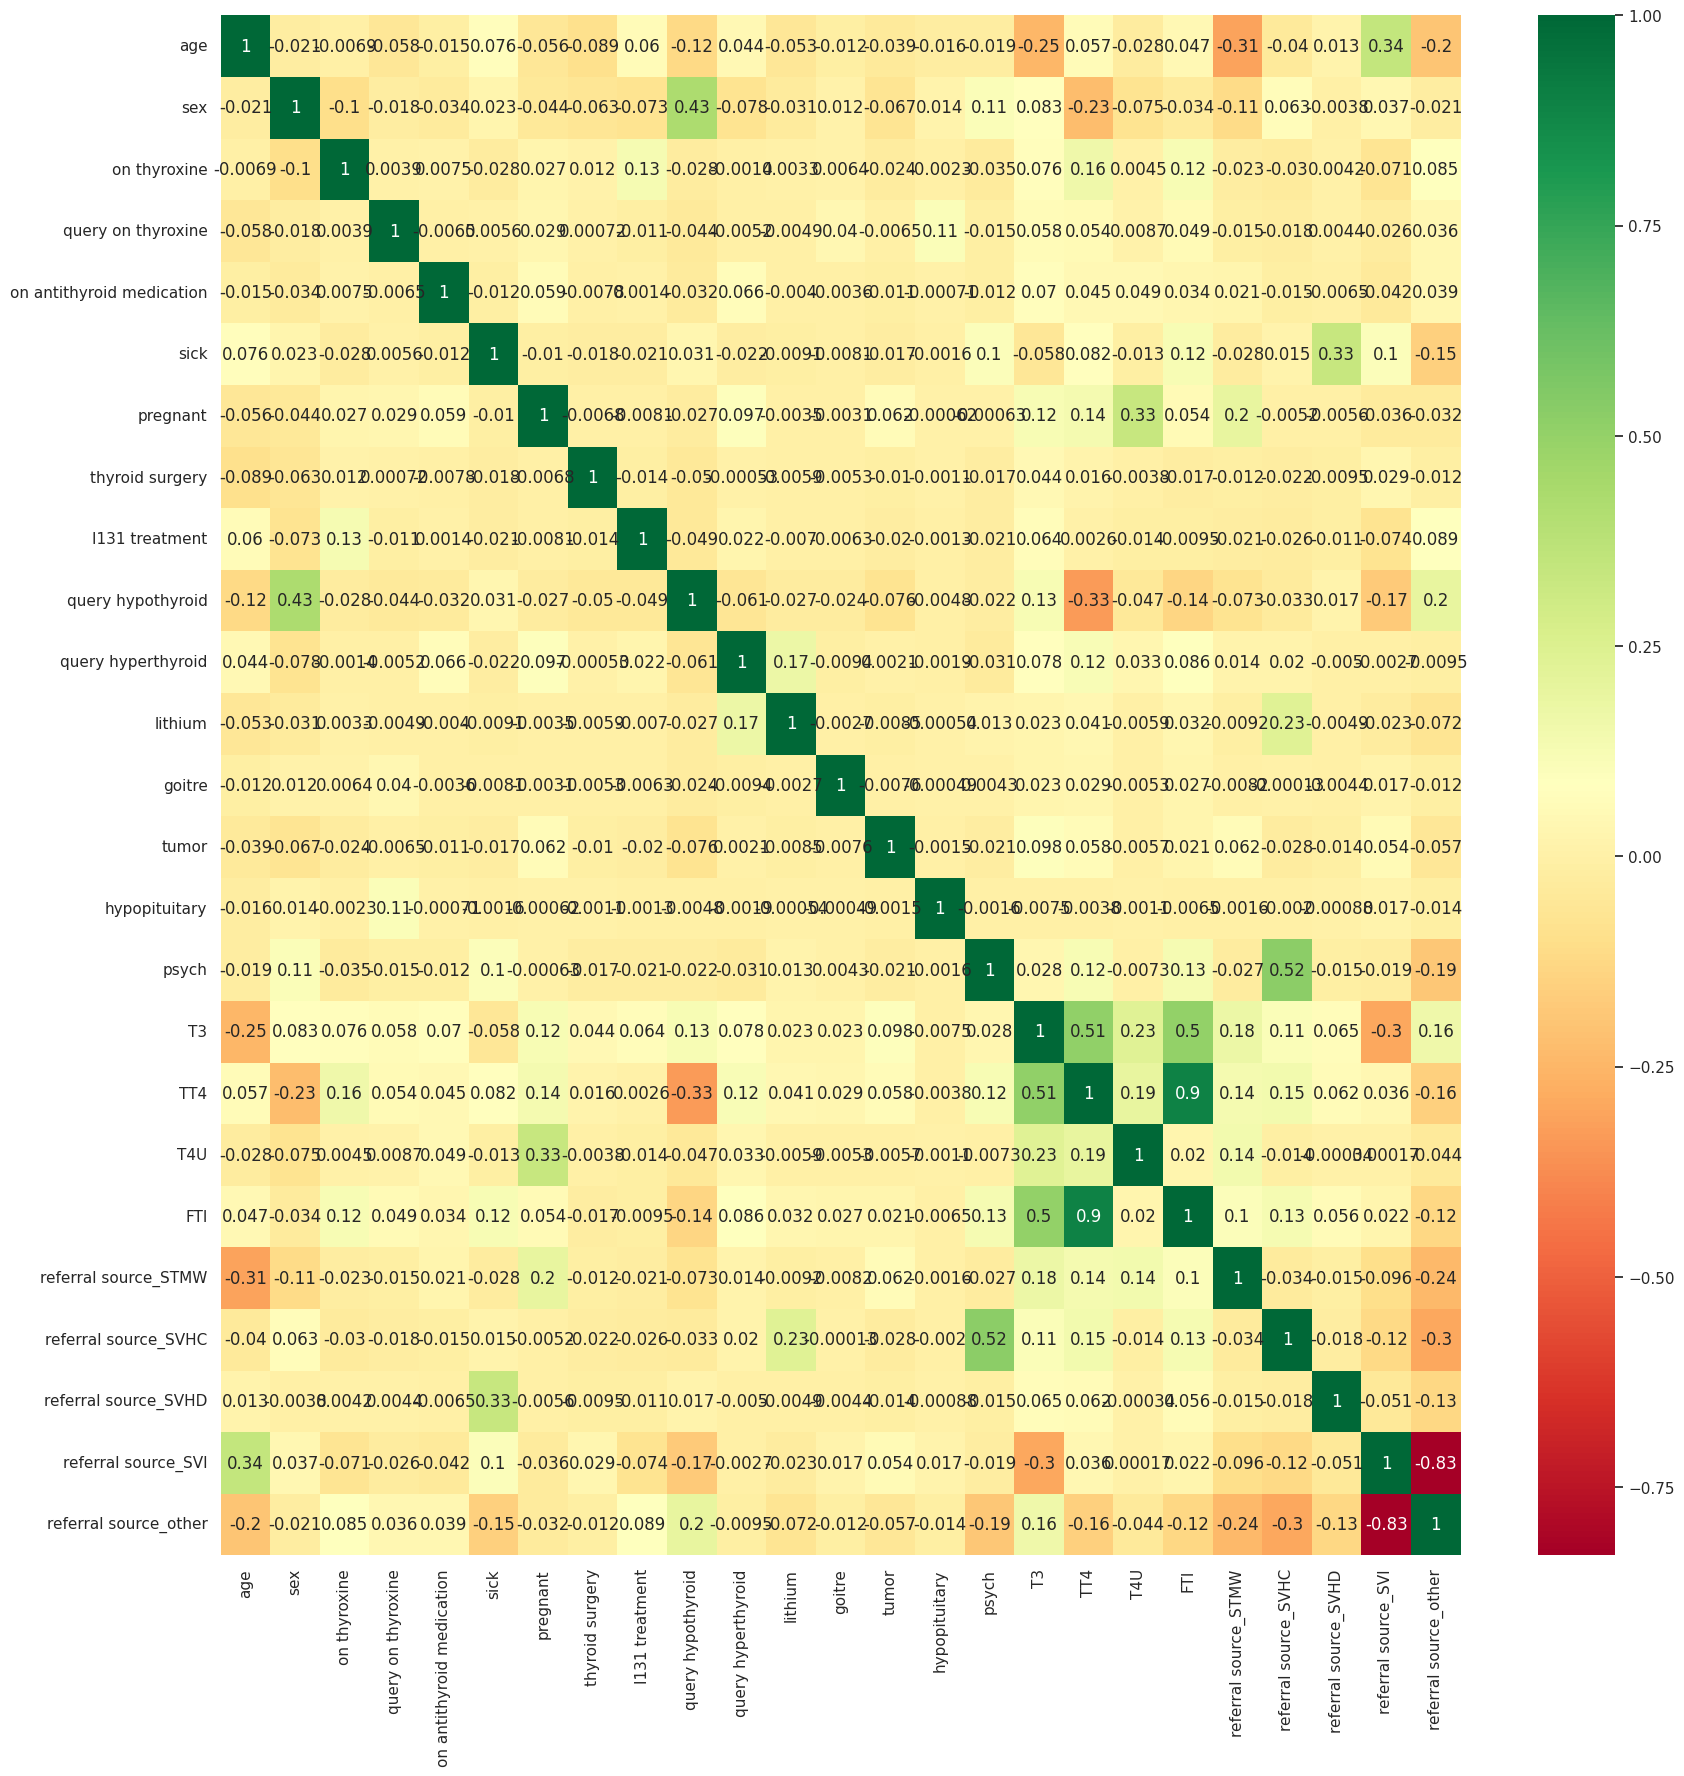

In [61]:
#same corealations can be seend on sampled data with out the target class
#get correlations of each features in dataset
corrmat = x_sampled.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(20,20))
#plot heat map
sns.heatmap(x_sampled[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The clustering of thyroid can be done considering different features. Here I'm trying to cluster different target Classes based on the sex and Recovery rate of indivisual country.

Checking the clusters



In [62]:
X=combined_data[["TT4","FTI"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
std=StandardScaler()
X=std.fit_transform(X)
X

array([[ 0.76974336,  0.54713717],
       [ 0.93795046,  1.1901936 ],
       [ 2.52390307,  2.71745262],
       ...,
       [-1.15262345, -0.49782953],
       [-0.52785423, -0.57821158],
       [-1.15262345, -0.49782953]])

In [63]:
#using elbow method to dtetrminne the number of clusters and validating it through silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Silhouette Score Method')

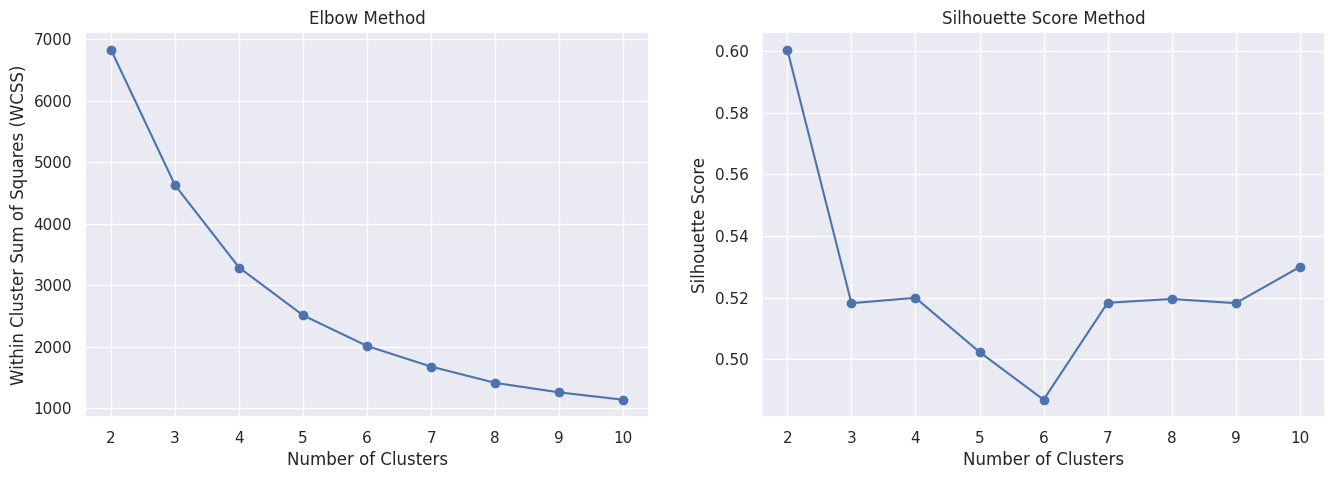

In [64]:
#silhouette_score to validate number of clusters are chosen correctly
fig, (ax1, ax2) = plot.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

We can seefrom the elbow method results and silhoutte score methods it is good to go ahead with K = 4

In [65]:
clf_final=KMeans(n_clusters=2,init='k-means++',random_state=6)
clf_final.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=6)

In [66]:
combined_data["Clusters"]=clf_final.predict(X)

<Axes: xlabel='TT4', ylabel='FTI'>

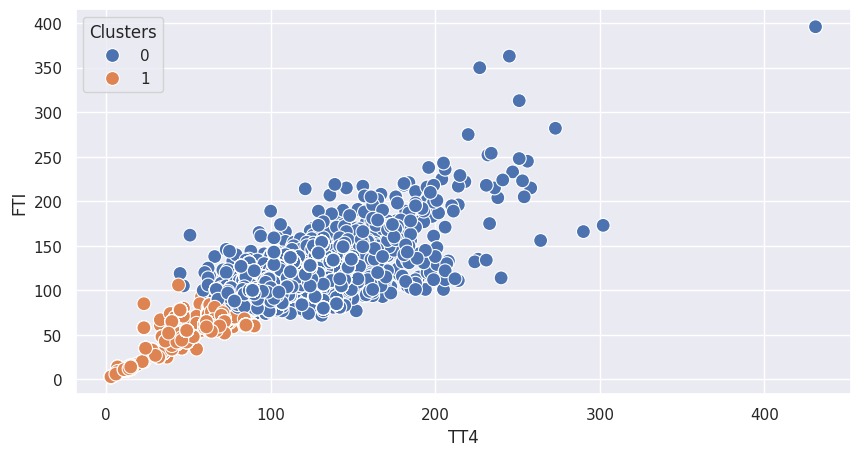

In [67]:
plot.figure(figsize=(10,5))
sns.scatterplot(x=combined_data["TT4"],y=combined_data["FTI"],hue=combined_data["Clusters"],s=100)

In [68]:
print("Few points in dataset belonging to Cluster 0: ",list(combined_data[combined_data["Clusters"]==0].head(10).index))
print("Few points in dataset belonging to Cluster 1: ",list(combined_data[combined_data["Clusters"]==1].head(10).index))

Few points in dataset belonging to Cluster 0:  [0, 1, 2, 4, 6, 7, 8, 9, 10, 11]
Few points in dataset belonging to Cluster 1:  [3, 5, 15, 25, 33, 39, 56, 61, 87, 88]


Checking the VIF score for multicollinearity

In [69]:
def vif_score(x):
    scaler = StandardScaler() # performing scaling on data without output class
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [70]:
vif_score(x_sampled)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,FEATURE,VIF_SCORE
0,age,1.367166
1,sex,1.479979
2,on thyroxine,1.068918
3,query on thyroxine,1.028782
4,on antithyroid medication,1.016191
5,sick,1.201666
6,pregnant,1.182950
7,thyroid surgery,1.030811
8,I131 treatment,1.053360
9,query hypothyroid,1.662942


We can see that the data has multicollinearity the features which are depicting that are referral_source_STMW, referral_source_SVHC, referral_source_SVHD referral_source_SVI, referral_source_other, TT4 and FTI so dropping the first four referral_source_STMW, referral_source_SVHC, referral_source_SVHD referral_source_SVI, TT4 and FTI for preventing multicollinearity

NOTE: here FTI and TT4 are the feature we performed clustering on but due to high VIF value i am dropping those (the dataset is small) and from the corelation matrix after drooping the feature TT4 and FTI we can see that there ain't any features with positive corelation so here we can take advice from doctors to ask which are the prominent featrures as ooer them to perform our clustering in making the model better or we can incllude those two features without dropping with high VIF and then compute the results or drop them and compite the results (a discussion between client and supervisor is first required in these scenarios)

Here i have finally decided to dropped the columns to prevent multicollinearity.

In [71]:
x_sampled.drop('referral source_STMW', axis=1, inplace = True)

In [72]:
x_sampled.drop('referral source_SVHC', axis=1, inplace = True)

In [73]:
x_sampled.drop('referral source_SVHD', axis=1, inplace = True)

In [74]:
# x_sampled.drop('referral source_SVI', axis=1, inplace = True)

In [75]:
x_sampled.drop('TT4', axis=1, inplace = True)

In [76]:
x_sampled.drop('FTI', axis=1, inplace = True)

In [77]:
x_sampled

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,T4U,referral source_SVI,referral source_other
0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0
2,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0
3,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0
4,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0
10312,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0
10313,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0
10314,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0


In [78]:
# checking VIF score agian
vif_score(x_sampled)

,FEATURE,VIF_SCORE
0,age,1.244486
1,sex,1.305616
2,on thyroxine,1.040084
3,query on thyroxine,1.027467
4,on antithyroid medication,1.015561
5,sick,1.043311
6,pregnant,1.154648
7,thyroid surgery,1.025458
8,I131 treatment,1.042621
9,query hypothyroid,1.324500


Now we can see that multicollinearity is not present in the data proceding ahead with training the model using different algorithms

<Axes: >

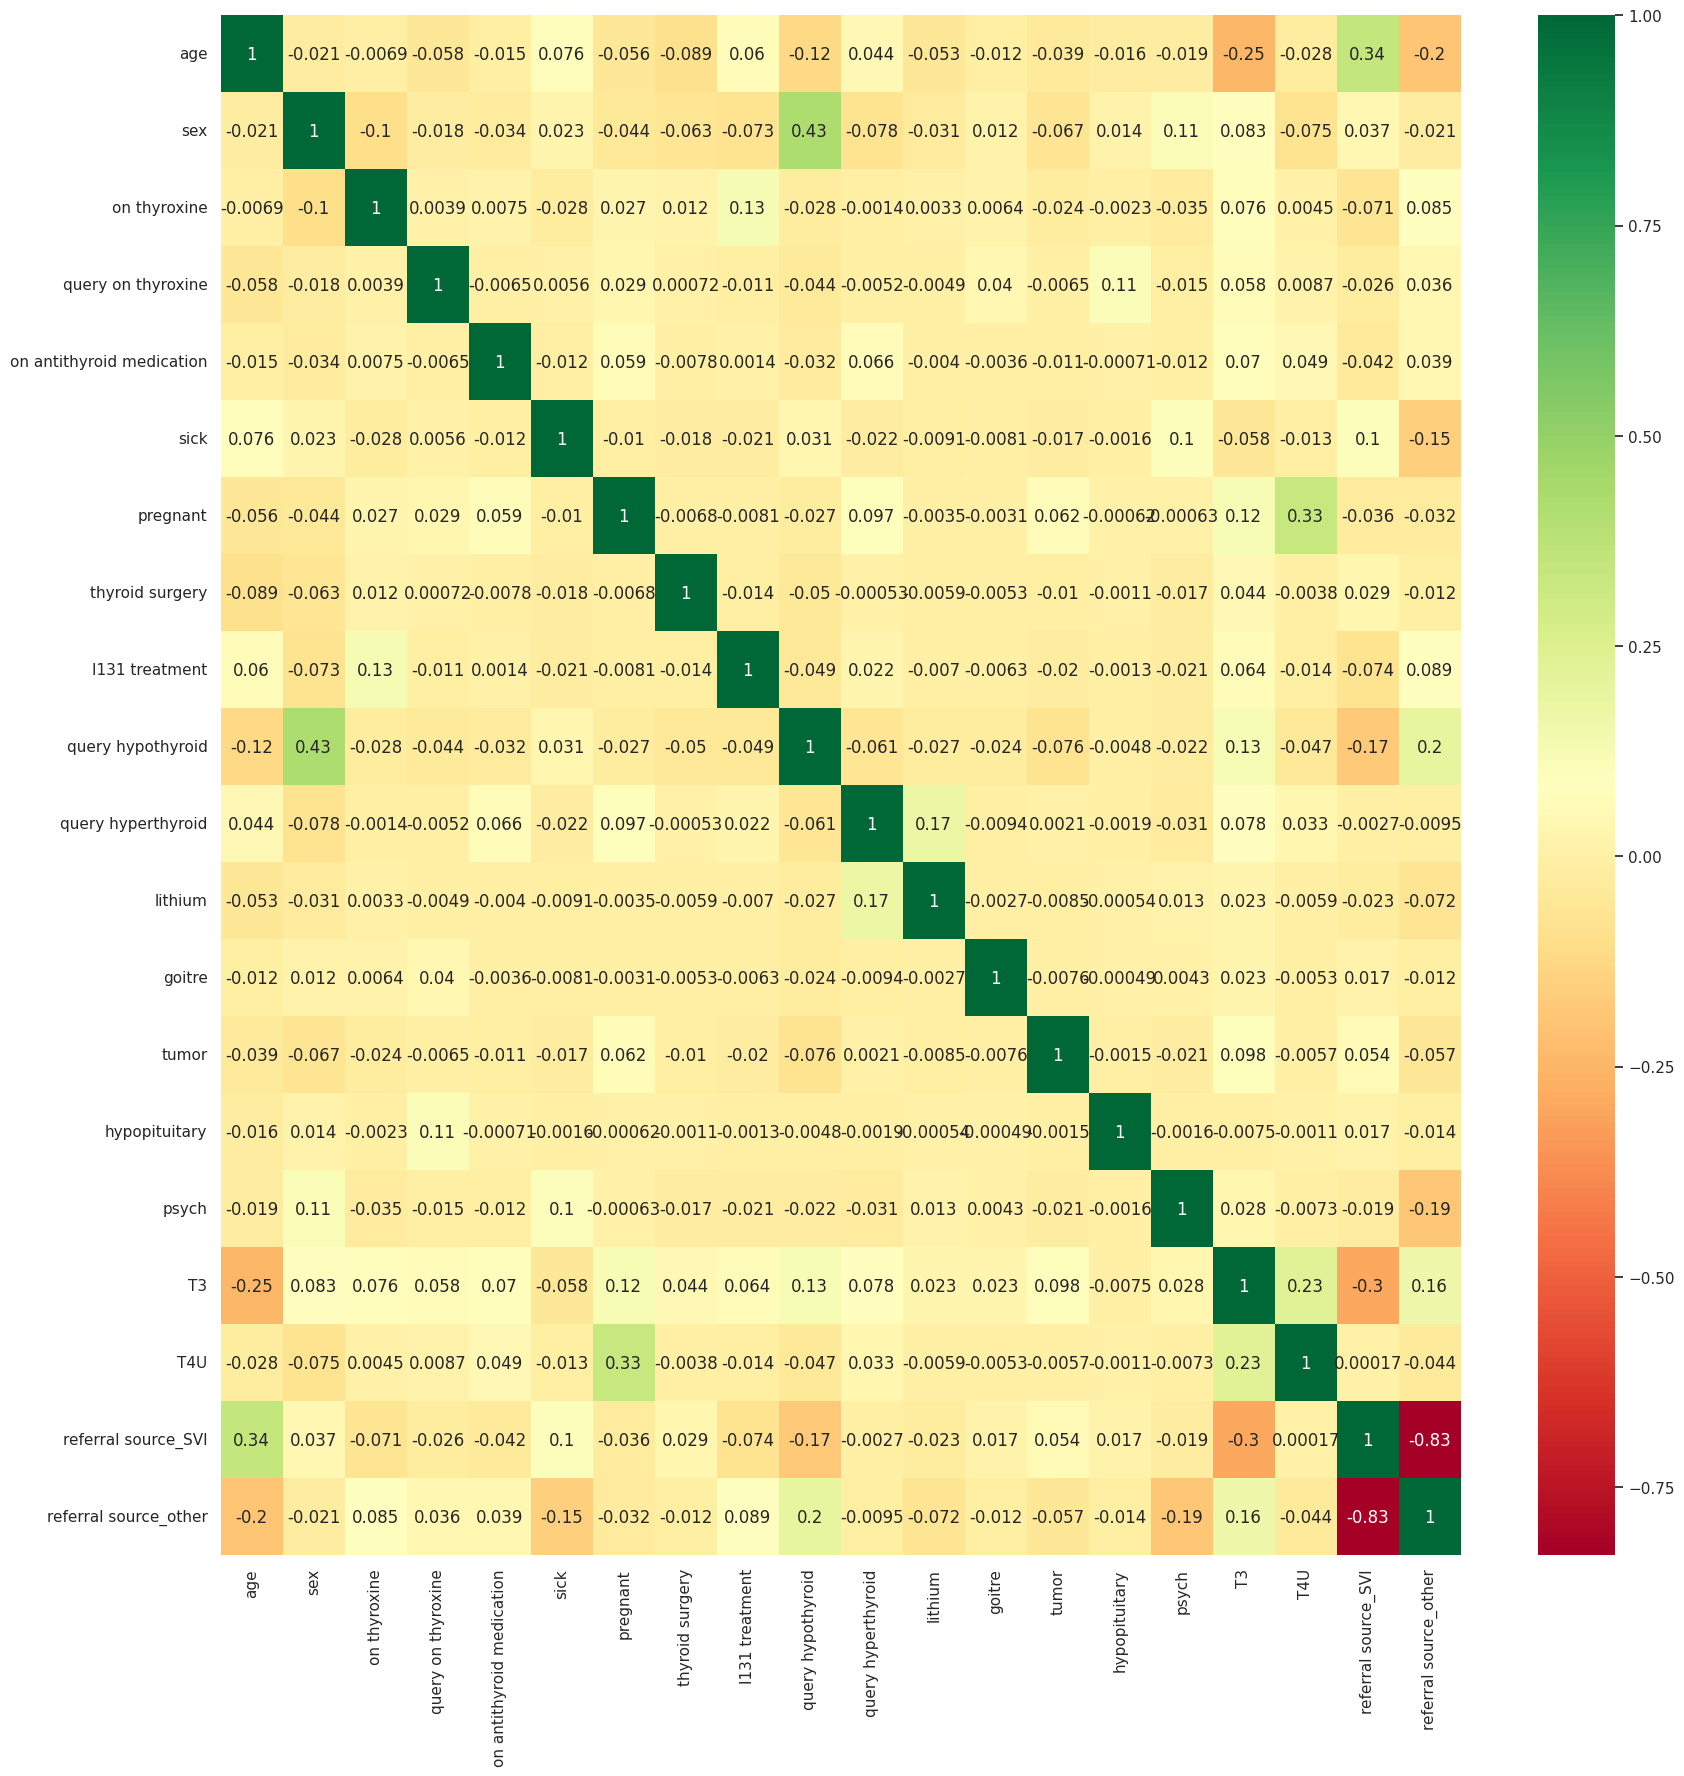

In [79]:
#same corealations can be seend on sampled data with out the target class
#get correlations of each features in dataset
corrmat = x_sampled.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(20,20))
#plot heat map
sns.heatmap(x_sampled[top_corr_features].corr(),annot=True,cmap="RdYlGn")

 Cross validating if there are any features we can use again for clustering but there ain't any good features as per problem statement to perform clustering (This dataset is small)

In [80]:
#scaling down the sampled data before it was done in function only to check the vif score
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x_sampled)
X_scaled

array([[-1.48120413, -0.69961418, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806],
       [-0.17366738,  1.42935924, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806],
       [ 1.19071878, -0.69961418,  4.29699324, ..., -0.10744342,
        -0.57630556,  0.69362806],
       ...,
       [-0.4579145 ,  1.42935924, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806],
       [-0.17366738, -0.69961418, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806],
       [-0.4579145 ,  1.42935924, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806]])

In [81]:
y_sampled.unique()

array([1., 0., 2., 3.])

In [82]:
# performing train test split
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y_sampled , test_size = .20 , random_state = 144) #using 20% of data as test set

In [83]:
x_train

array([[ 0.33797743,  1.42935924, -0.23272087, ..., -0.10744342,
         1.73519061, -1.44169485],
       [ 0.73592339,  1.42935924, -0.23272087, ..., -0.10744342,
         1.73519061, -1.44169485],
       [ 0.62222455, -0.69961418, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806],
       ...,
       [-1.36750528, -0.69961418, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806],
       [ 1.64551417, -0.69961418, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806],
       [-0.4579145 ,  1.42935924, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806]])

In [84]:
x_test

array([[-0.4579145 ,  1.42935924, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806],
       [-1.02640874,  1.42935924, -0.23272087, ..., -0.10744342,
         1.73519061, -1.44169485],
       [-0.85586047, -0.69961418, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806],
       ...,
       [-1.25380643, -0.69961418, -0.23272087, ..., -0.10744342,
        -0.57630556, -1.44169485],
       [-0.4579145 ,  1.42935924, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806],
       [ 1.19071878, -0.69961418, -0.23272087, ..., -0.10744342,
        -0.57630556,  0.69362806]])

In [85]:
y_test

10100    3.0
2620     1.0
4716     0.0
10118    3.0
7528     2.0
        ... 
9473     3.0
9912     3.0
2084     1.0
8466     3.0
4061     0.0
Name: Class, Length: 2064, dtype: float64

In [86]:
x_test[0]

array([-0.4579145 ,  1.42935924, -0.23272087, -0.08951261, -0.07254056,
       -0.16518293, -0.06316857, -0.10710608, -0.12788542,  2.03344363,
       -0.1907021 , -0.0549008 , -0.049288  , -0.15400447, -0.00984613,
       -0.16331557,  0.46757904, -0.10744342, -0.57630556,  0.69362806])

### Using logistic Regression Classifier

In [87]:
logisticregression_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [88]:
logisticregression_liblinear.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [89]:
logisticregression_liblinear.predict(x_test)

array([3., 1., 0., ..., 1., 3., 1.])

In [90]:
logisticregression_liblinear.predict([x_test[1]])

array([1.])

In [91]:
logisticregression_liblinear.predict_log_proba([x_test[1]])

array([[-1.09394318, -0.86988954, -1.40281861, -8.48790532]])

In [92]:
y_pred_liblinear_probility = logisticregression_liblinear.predict_log_proba(x_test)
y_pred_liblinear_probility

array([[-2.02097842, -2.85581457, -3.01690786, -0.2731049 ],
       [-1.09394318, -0.86988954, -1.40281861, -8.48790532],
       [-0.9193822 , -1.38417243, -1.98224095, -1.54672862],
       ...,
       [-1.16785402, -0.53842261, -2.25349218, -8.23086483],
       [-2.02097842, -2.85581457, -3.01690786, -0.2731049 ],
       [-0.89697973, -0.82598635, -2.62005486, -2.50594182]])

In [93]:
y_test.iloc[1]

1.0

In [94]:
y_pred_liblinear = logisticregression_liblinear.predict(x_test)
y_pred_liblinear

array([3., 1., 0., ..., 1., 3., 1.])

In [98]:
# # confusion_matrix funnction a matrix containing the summary of predictions
# print(confusion_matrix(y_test, y_pred_liblinear))


# # plot_confusion_matrix function is used to visualize the confusion matrix
# ConfusionMatrixDisplay(logisticregression_liblinear, x_test, y_test)
# plot.grid(False)
# plot.show()

In [99]:
print(f"Accuracy of the logisticregression_liblinear classifier is: {accuracy_score(y_test, y_pred_liblinear)}")
print(f"Precision Score of the logisticregression_liblinear classifier is: {precision_score(y_test, y_pred_liblinear, average='micro')}")
print(f"Recall Score of the logisticregression_liblinear classifier is: {recall_score(y_test, y_pred_liblinear, average='micro')}")
print(f"Recall Score of the logisticregression_liblinear classifier is: {recall_score(y_test, y_pred_liblinear, average='micro')}")

Accuracy of the logisticregression_liblinear classifier is: 0.625484496124031
Precision Score of the logisticregression_liblinear classifier is: 0.625484496124031
Recall Score of the logisticregression_liblinear classifier is: 0.625484496124031
Recall Score of the logisticregression_liblinear classifier is: 0.625484496124031


In [100]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_test,y_pred_liblinear)

0.7460324776704221

In [101]:
auc = multiclass_roc_auc_score(y_test,y_pred_liblinear)

In [102]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_liblinear, pos_label= 0)

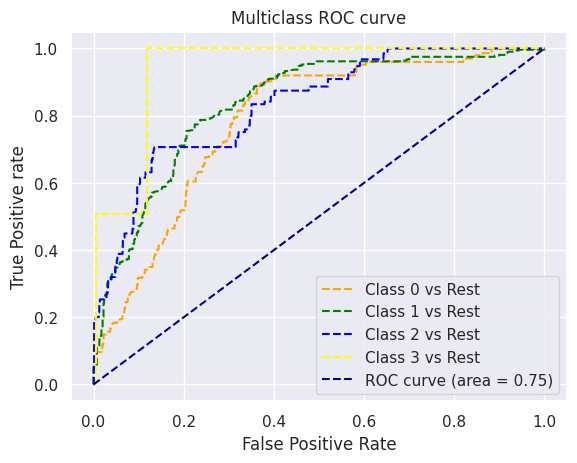

In [103]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_liblinear_probility[:,i], pos_label= i)

# plotting
plot.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plot.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plot.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plot.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plot.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plot.title('Multiclass ROC curve')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive rate')
plot.legend(loc='best')
plot.savefig('Multiclass ROC',dpi=300);

### Using Support Vector Classifer

In [104]:
from sklearn.svm import SVC
SVC_clf = SVC(kernel='linear',gamma='auto', probability=True)
SVC_clf.fit(x_train,y_train )

SVC(gamma='auto', kernel='linear', probability=True)

In [105]:
y_pred_SVC_probility = SVC_clf.predict_proba(x_test)
y_pred_SVC_probility

array([[0.10694959, 0.06366683, 0.10790473, 0.72147885],
       [0.33479021, 0.51272483, 0.15162873, 0.00085623],
       [0.57639925, 0.32531872, 0.08883298, 0.00944905],
       ...,
       [0.28793691, 0.55631345, 0.15370607, 0.00204356],
       [0.10694959, 0.06366683, 0.10790473, 0.72147885],
       [0.50040619, 0.35365281, 0.12930007, 0.01664093]])

In [106]:
y_pred_SVC = SVC_clf.predict(x_test)
y_pred_SVC

array([3., 1., 0., ..., 1., 3., 0.])

In [109]:
# confusion_matrix funnction a matrix containing the summary of predictions


In [110]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_test,y_pred_SVC)

0.7707518065515336

In [111]:
auc2 = multiclass_roc_auc_score(y_test,y_pred_SVC)
auc2

0.7707518065515336

In [112]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_SVC, pos_label= 0)

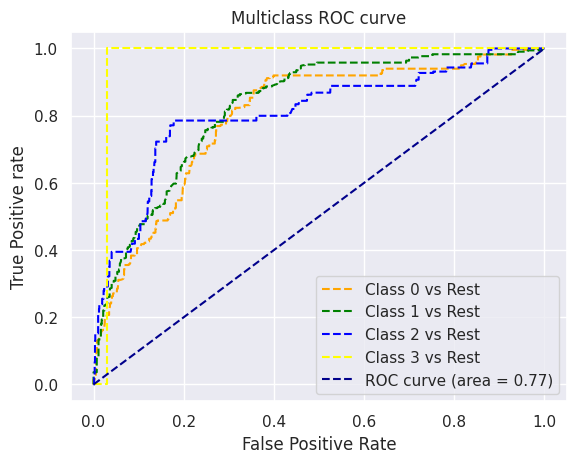

In [113]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_SVC_probility[:,i], pos_label= i)

# plotting
plot.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plot.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plot.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plot.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plot.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc2)
plot.title('Multiclass ROC curve')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive rate')
plot.legend(loc='best')
plot.savefig('Multiclass ROC',dpi=300);

### Using K Nearest Neighbors Classifier

In [114]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier_KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [115]:
y_pred_classifier_KNN = classifier_KNN.predict(x_test)
y_pred_classifier_KNN

array([3., 1., 0., ..., 1., 3., 0.])

In [116]:
classifier_KNN.score(x_train, y_train)

0.9132331555986427

In [117]:
classifier_KNN.score(x_test, y_test)

0.9031007751937985

In [118]:
y_pred_Prob_classifier_KNN = classifier_KNN.predict_proba(x_test)
y_pred_Prob_classifier_KNN

array([[0. , 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. ],
       [1. , 0. , 0. , 0. ],
       ...,
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0.8, 0.2, 0. , 0. ]])

In [119]:
# # confusion_matrix funnction a matrix containing the summary of predictions
# print(confusion_matrix(y_test, y_pred_classifier_KNN))

# # plotting confusion_matrix
# IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
# plot_confusion_matrix(IC, y_pred_classifier_KNN, y_test); #normalize='true', values_format='.2%'
# plot.grid(False)
# plot.show()

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classifier_KNN))
#Checking performance our model with ROC Score.
multiclass_roc_auc_score(y_test,y_pred_classifier_KNN)

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85       498
         1.0       0.94      0.72      0.82       522
         2.0       0.93      0.95      0.94       494
         3.0       1.00      1.00      1.00       550

    accuracy                           0.90      2064
   macro avg       0.91      0.90      0.90      2064
weighted avg       0.91      0.90      0.90      2064



0.9354190264414237

In [121]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_test,y_pred_classifier_KNN)

0.9354190264414237

In [122]:
auc3 = multiclass_roc_auc_score(y_test,y_pred_classifier_KNN)
auc3

0.9354190264414237

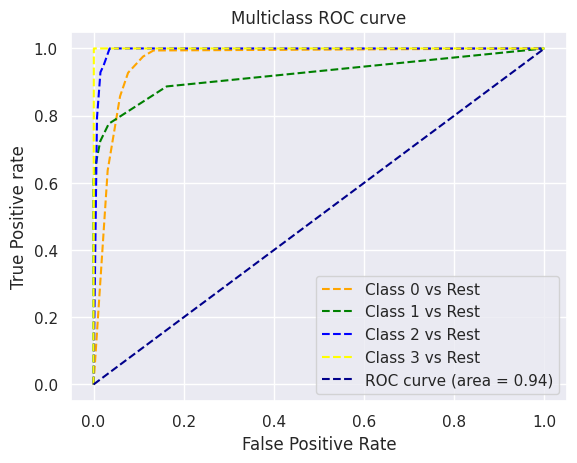

In [123]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_classifier_KNN, pos_label= 0)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_Prob_classifier_KNN[:,i], pos_label= i)

# plotting
plot.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plot.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plot.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plot.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plot.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc3)
plot.title('Multiclass ROC curve')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive rate')
plot.legend(loc='best')
plot.savefig('Multiclass ROC',dpi=300);

In [124]:
classifier_KNN.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

After comparing Logistic regressor , SCV and KNN Classfier I have got the best results in case of KNN Classifier Now performing Hyperparamter tuning on it using GridSerchCV and RandomisedSearchCV

In [125]:
#using gridSearchCV
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(1,5))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
#knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(classifier_KNN, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 2


In [126]:
prediction = best_model.predict(x_test)

In [127]:
#after hyper paramter tuning using GricdserchCV report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))
#Checking performance our model with ROC Score.
multiclass_roc_auc_score(y_test,prediction)

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.86       498
         1.0       0.96      0.76      0.85       522
         2.0       0.94      0.94      0.94       494
         3.0       1.00      1.00      1.00       550

    accuracy                           0.91      2064
   macro avg       0.92      0.91      0.91      2064
weighted avg       0.92      0.91      0.91      2064



0.9431095823706085

The multiclass roc auc score has imporved after the tuning of KNN model usign Grid Serch CV

In [128]:
#using randomized searchCV
# from sklearn.model_selection import RandomizedSearchCV
# rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
# rf_random.fit(X_train,y_train)

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [131]:
#Randomized Search CV
# Create the random grid
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#'algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'
random_grid = { 'leaf_size':leaf_size,
                'n_neighbors':n_neighbors,
                'p':p}
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = classifier_KNN, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................leaf_size=15, n_neighbors=25, p=1; total time=   1.0s
[CV] END ..................leaf_size=15, n_neighbors=25, p=1; total time=   0.8s
[CV] END ..................leaf_size=15, n_neighbors=25, p=1; total time=   0.4s
[CV] END ..................leaf_size=15, n_neighbors=25, p=1; total time=   0.5s
[CV] END ..................leaf_size=15, n_neighbors=25, p=1; total time=   0.4s
[CV] END ..................leaf_size=23, n_neighbors=10, p=1; total time=   0.4s
[CV] END ..................leaf_size=23, n_neighbors=10, p=1; total time=   0.4s
[CV] END ..................leaf_size=23, n_neighbors=10, p=1; total time=   0.4s
[CV] END ..................leaf_size=23, n_neighbors=10, p=1; total time=   0.4s
[CV] END ..................leaf_size=23, n_neighbors=10, p=1; total time=   0.4s
[CV] END ..................leaf_size=20, n_neighbors=15, p=1; total time=   0.4s
[CV] END ..................leaf_size=20, n_neigh

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'p': [1, 2]},
                   random_state=42, scoring='accuracy', verbose=2)

In [132]:
rf_random.best_params_

{'p': 1, 'n_neighbors': 2, 'leaf_size': 9}

In [133]:
prediction_RSCV = rf_random.predict(x_test)

In [134]:
#after hyper paramter tuning using Randomized Search CV report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_RSCV))
#Checking performance our model with ROC Score.
multiclass_roc_auc_score(y_test,prediction_RSCV)

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.86       498
         1.0       0.96      0.76      0.85       522
         2.0       0.94      0.94      0.94       494
         3.0       1.00      1.00      1.00       550

    accuracy                           0.91      2064
   macro avg       0.92      0.91      0.91      2064
weighted avg       0.92      0.91      0.91      2064



0.9431095823706085

#### RESULT
the best result was found in case of KNN classfier and it was furter hypertuned using the hyperparmeters and gridserchCV adn the AUC ROC sore came out to be 0.9363043550295604 in that case